In [1]:
import category_encoders as ce

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,12.)})
sns.set_style("whitegrid")

In [2]:
datos = pd.read_csv("../data/datos_numericos_limpios_sin_outliers.csv")

In [3]:
datos

,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
0,2,1,2,1,55,4.90,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,60,4.80,1,1,1,1,0,0,1,0,0,1
2,2,1,2,1,55,4.93,1,1,1,0,1,1,1,1,1,1
3,5,2,3,1,85,4.95,1,1,1,0,1,1,0,1,0,1
4,4,1,2,1,60,3.33,1,1,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,8,3,4,2,228,4.91,1,1,1,1,0,0,1,0,0,1
2333,5,1,3,1,93,3.50,1,0,0,1,1,1,0,0,0,1
2334,7,4,7,1,160,4.85,1,1,1,1,0,0,1,0,0,1
2335,5,3,6,2,125,5.00,1,1,1,1,1,1,0,0,0,1


In [4]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

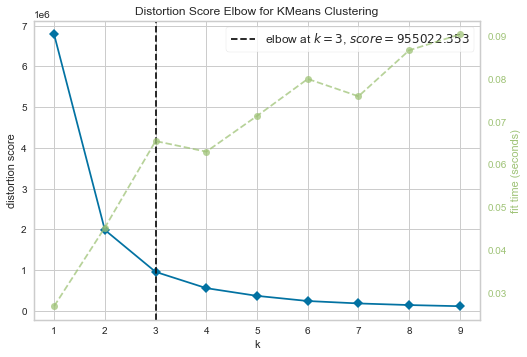

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(datos[["precio_eur"]])
visualizer.show();

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(2)
datos_t = pd.DataFrame(pca.fit_transform(datos.drop(columns="valoracion")), columns=["PC1", "PC2"] )

/Users/franciscovispo/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


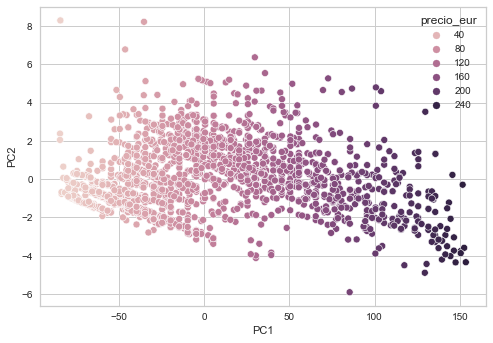

In [8]:
pca_precio = sns.scatterplot(datos_t["PC1"],datos_t["PC2"], hue=datos["precio_eur"]);


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
dat_ = datos.copy()

In [11]:
dat_.drop(columns="precio_eur", inplace=True)

In [12]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

,huespedes,dormitorios,camas,baños,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
0,-1.139654,-0.791920,-0.447473,-0.587074,1.013181,0.540914,0.502406,0.642603,0.701667,0.533640,0.464673,1.53393,0.679366,0.942190,0.581138
1,-1.139654,-0.791920,-1.084734,-0.587074,0.730890,0.540914,0.502406,0.642603,0.701667,-1.873922,-2.152051,1.53393,-1.471960,-1.061357,0.581138
2,-1.139654,-0.791920,-0.447473,-0.587074,1.097869,0.540914,0.502406,0.642603,-1.425177,0.533640,0.464673,1.53393,0.679366,0.942190,0.581138
3,0.368484,0.265633,0.189788,-0.587074,1.154327,0.540914,0.502406,0.642603,-1.425177,0.533640,0.464673,-0.65192,0.679366,-1.061357,0.581138
4,-0.134229,-0.791920,-0.447473,-0.587074,-3.418795,0.540914,0.502406,0.642603,-1.425177,0.533640,0.464673,1.53393,-1.471960,-1.061357,-1.720761


In [13]:
km = KMeans(n_clusters=3)
km.fit(datos_t)

KMeans(n_clusters=3)

In [14]:
y_pred = km.predict(datos_t)

In [15]:
datos_t["predict"] = y_pred

In [16]:
datos_t["real"] = datos["precio_eur"]

In [17]:
datos_t.head()

,PC1,PC2,predict,real
0,-39.523812,-0.855524,1,55
1,-34.550045,-1.753644,1,60
2,-39.524360,-0.890088,1,55
3,-9.427930,1.147856,0,85
4,-34.474867,0.299099,1,60


In [18]:
crosstab = pd.crosstab(datos_t.predict, datos_t.real)

In [19]:
crosstab

real,10,11,12,13,14,15,16,17,18,19,...,237,238,239,240,241,242,245,246,247,248
predict,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2,2,2,3,13,4,5,16,7,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,1,2,1,2,1,2,1,1,1


In [20]:
df_scaler

,huespedes,dormitorios,camas,baños,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
0,-1.139654,-0.791920,-0.447473,-0.587074,1.013181,0.540914,0.502406,0.642603,0.701667,0.533640,0.464673,1.53393,0.679366,0.942190,0.581138
1,-1.139654,-0.791920,-1.084734,-0.587074,0.730890,0.540914,0.502406,0.642603,0.701667,-1.873922,-2.152051,1.53393,-1.471960,-1.061357,0.581138
2,-1.139654,-0.791920,-0.447473,-0.587074,1.097869,0.540914,0.502406,0.642603,-1.425177,0.533640,0.464673,1.53393,0.679366,0.942190,0.581138
3,0.368484,0.265633,0.189788,-0.587074,1.154327,0.540914,0.502406,0.642603,-1.425177,0.533640,0.464673,-0.65192,0.679366,-1.061357,0.581138
4,-0.134229,-0.791920,-0.447473,-0.587074,-3.418795,0.540914,0.502406,0.642603,-1.425177,0.533640,0.464673,1.53393,-1.471960,-1.061357,-1.720761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,1.876622,1.323185,0.827049,1.494855,1.041410,0.540914,0.502406,0.642603,0.701667,-1.873922,-2.152051,1.53393,-1.471960,-1.061357,0.581138
2333,0.368484,-0.791920,0.189788,-0.587074,-2.938899,0.540914,-1.990423,-1.556171,0.701667,0.533640,0.464673,-0.65192,-1.471960,-1.061357,0.581138
2334,1.373909,2.380738,2.738831,-0.587074,0.872035,0.540914,0.502406,0.642603,0.701667,-1.873922,-2.152051,1.53393,-1.471960,-1.061357,0.581138
2335,0.368484,1.323185,2.101570,1.494855,1.295473,0.540914,0.502406,0.642603,0.701667,0.533640,0.464673,-0.65192,-1.471960,-1.061357,0.581138


In [21]:
km2  = KMeans(n_clusters=3)
km2.fit(df_scaler)

KMeans(n_clusters=3)

In [22]:
y_cuatro = km2.predict(df_scaler)

In [23]:
df_scaler["real"] = datos.precio_eur
df_scaler["kmeans"] = y_cuatro

In [24]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real,10,11,12,13,14,15,16,17,18,19,...,237,238,239,240,241,242,245,246,247,248
kmeans,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,3,1,2,1,2,1,1,1,1,1
1,4,1,0,0,0,4,1,1,3,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,2,2,3,9,3,4,13,5,...,0,0,0,0,0,0,0,0,0,0


/Users/franciscovispo/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/franciscovispo/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


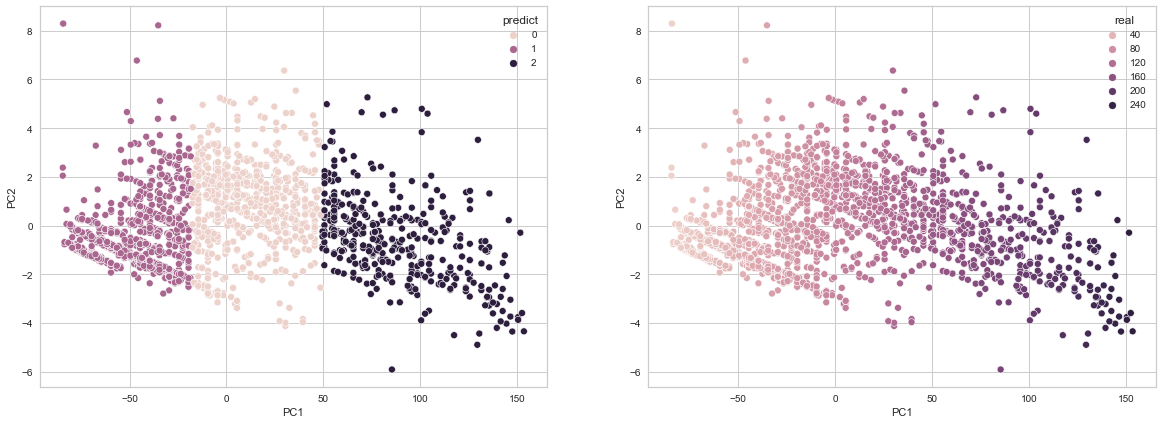

In [25]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_datos = sns.scatterplot(datos_t["PC1"],datos_t["PC2"], hue=datos_t["predict"], ax=axs[0]);
pca_datos= sns.scatterplot(datos_t["PC1"],datos_t["PC2"], hue=datos_t["real"], ax=axs[1]);

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
datos_t_solopcs = datos_t.drop(columns=["predict", "real"])

In [28]:
silhouette_score(datos_t_solopcs, y_pred)

0.5690994598563341

In [29]:
datos["predict"] = y_pred

In [30]:
datos

,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico,predict
0,2,1,2,1,55,4.90,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,60,4.80,1,1,1,1,0,0,1,0,0,1,1
2,2,1,2,1,55,4.93,1,1,1,0,1,1,1,1,1,1,1
3,5,2,3,1,85,4.95,1,1,1,0,1,1,0,1,0,1,0
4,4,1,2,1,60,3.33,1,1,1,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,8,3,4,2,228,4.91,1,1,1,1,0,0,1,0,0,1,2
2333,5,1,3,1,93,3.50,1,0,0,1,1,1,0,0,0,1,0
2334,7,4,7,1,160,4.85,1,1,1,1,0,0,1,0,0,1,2
2335,5,3,6,2,125,5.00,1,1,1,1,1,1,0,0,0,1,0


In [31]:
df_clusters = datos[["predict"]]

In [32]:
datos_original = pd.read_csv("../data/datos_limpios_final.csv")

In [33]:
df = pd.concat([df_clusters, datos_original], axis=1)

In [34]:
df

,predict,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento,limpieza,llegada_autonoma,ubicacion_fantastica,wifi,cocina,lavadora,aire,secador,frigorifico,ciudad
0,1.0,2,1,2,1,55,4.90,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,No ubicación_fantastica,Wifi,Cocina,No lavadora,Aire acondicionado,Secador de pelo,No Frigorífico,Madrid
1,1.0,2,1,1,1,60,4.80,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,No ubicación_fantastica,No Wifi,No cocina,No lavadora,No Aire acondicionado,No Secador de pelo,No Frigorífico,Madrid
2,1.0,2,1,2,1,55,4.93,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,Ubicación fantástica,Wifi,Cocina,No lavadora,Aire acondicionado,Secador de pelo,No Frigorífico,Madrid
3,0.0,5,2,3,1,85,4.95,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,Ubicación fantástica,Wifi,Cocina,Lavadora,Aire acondicionado,No Secador de pelo,No Frigorífico,Madrid
4,1.0,4,1,2,1,60,3.33,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,Ubicación fantástica,Wifi,Cocina,No lavadora,No Aire acondicionado,No Secador de pelo,Frigorífico,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,NaN,8,3,4,2,228,4.91,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,No ubicación_fantastica,No Wifi,No cocina,No lavadora,No Aire acondicionado,No Secador de pelo,No Frigorífico,Sevilla
2396,NaN,5,1,3,1,93,3.50,Alojamiento entero,No Limpieza avanzada,Llegada autónoma,No ubicación_fantastica,Wifi,Cocina,Lavadora,No Aire acondicionado,No Secador de pelo,No Frigorífico,Sevilla
2397,NaN,7,4,7,1,160,4.85,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,No ubicación_fantastica,No Wifi,No cocina,No lavadora,No Aire acondicionado,No Secador de pelo,No Frigorífico,Sevilla
2398,NaN,5,3,6,2,125,5.00,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,No ubicación_fantastica,Wifi,Cocina,Lavadora,No Aire acondicionado,No Secador de pelo,No Frigorífico,Sevilla


In [35]:
cluster_0 = df[df["predict"] == 0]

In [36]:
cluster_0.precio_eur.mean()

120.6774193548387

In [37]:
cluster_1 = df[df["predict"] == 1]

In [38]:
cluster_1.precio_eur.mean()

58.67915465898175

In [39]:
cluster_2 = df[df["predict"] == 2]

In [40]:
cluster_2.precio_eur.mean()

143.38126361655773

In [41]:
df.predict.unique()

array([ 1.,  0.,  2., nan])

In [42]:
cluster_0.columns

Index(['predict', 'huespedes', 'dormitorios', 'camas', 'baños', 'precio_eur',
       'valoracion', 'alojamiento', 'limpieza', 'llegada_autonoma',
       'ubicacion_fantastica', 'wifi', 'cocina', 'lavadora', 'aire', 'secador',
       'frigorifico', 'ciudad'],
      dtype='object')

# observaciones - info

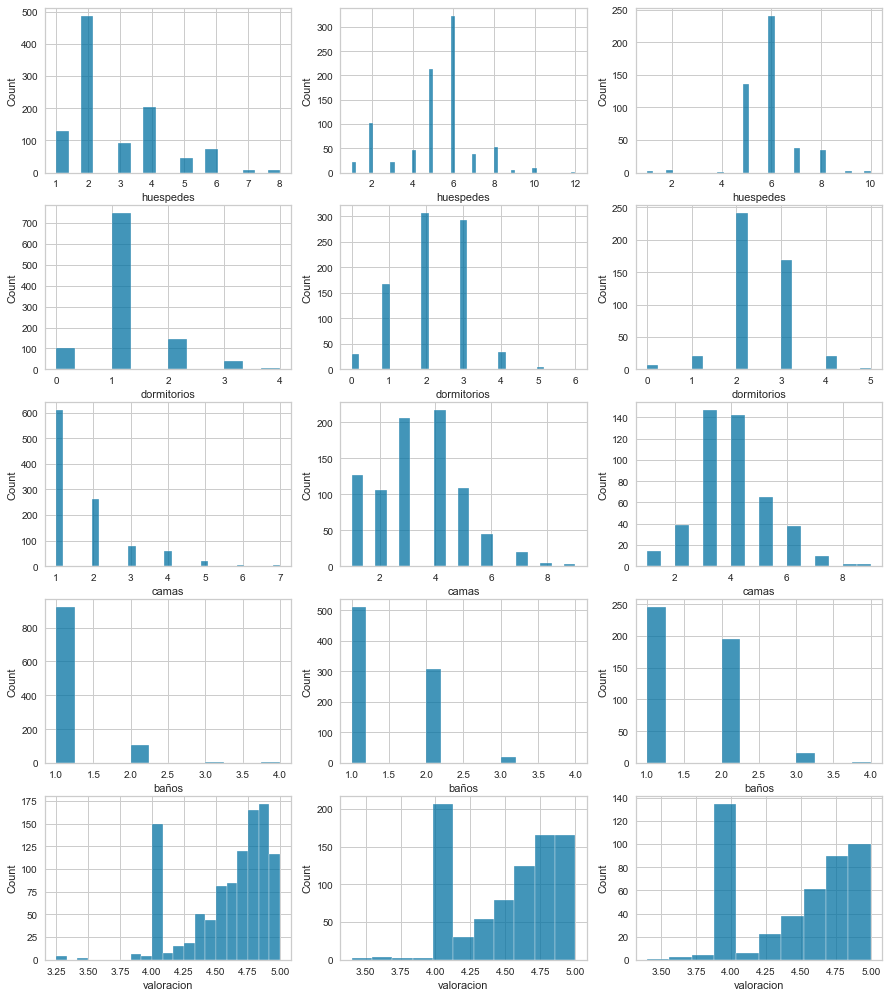

In [43]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15,17.5))
sns.histplot(x=cluster_1.huespedes, palette="Blues", ax=axs[0,0]);
sns.histplot(x=cluster_0.huespedes, palette="Blues", ax=axs[0,1]);
sns.histplot(x=cluster_2.huespedes, palette="rocket", ax=axs[0,2]);
sns.histplot(x=cluster_1.dormitorios, palette="Blues", ax=axs[1,0]);
sns.histplot(x=cluster_0.dormitorios, palette="Blues", ax=axs[1,1]);
sns.histplot(x=cluster_2.dormitorios, palette="rocket", ax=axs[1,2]);
sns.histplot(x=cluster_1.camas, palette="Blues", ax=axs[2,0]);
sns.histplot(x=cluster_0.camas, palette="Blues", ax=axs[2,1]);
sns.histplot(x=cluster_2.camas, palette="rocket", ax=axs[2,2]);
sns.histplot(x=cluster_1.baños, palette="Blues", ax=axs[3,0]);
sns.histplot(x=cluster_0.baños, palette="Blues", ax=axs[3,1]);
sns.histplot(x=cluster_2.baños, palette="rocket", ax=axs[3,2]);
sns.histplot(x=cluster_1.valoracion, palette="Blues", ax=axs[4,0]);
sns.histplot(x=cluster_0.valoracion, palette="Blues", ax=axs[4,1]);
sns.histplot(x=cluster_2.valoracion, palette="rocket", ax=axs[4,2]);

In [44]:
#sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins);


# observaciones - carac

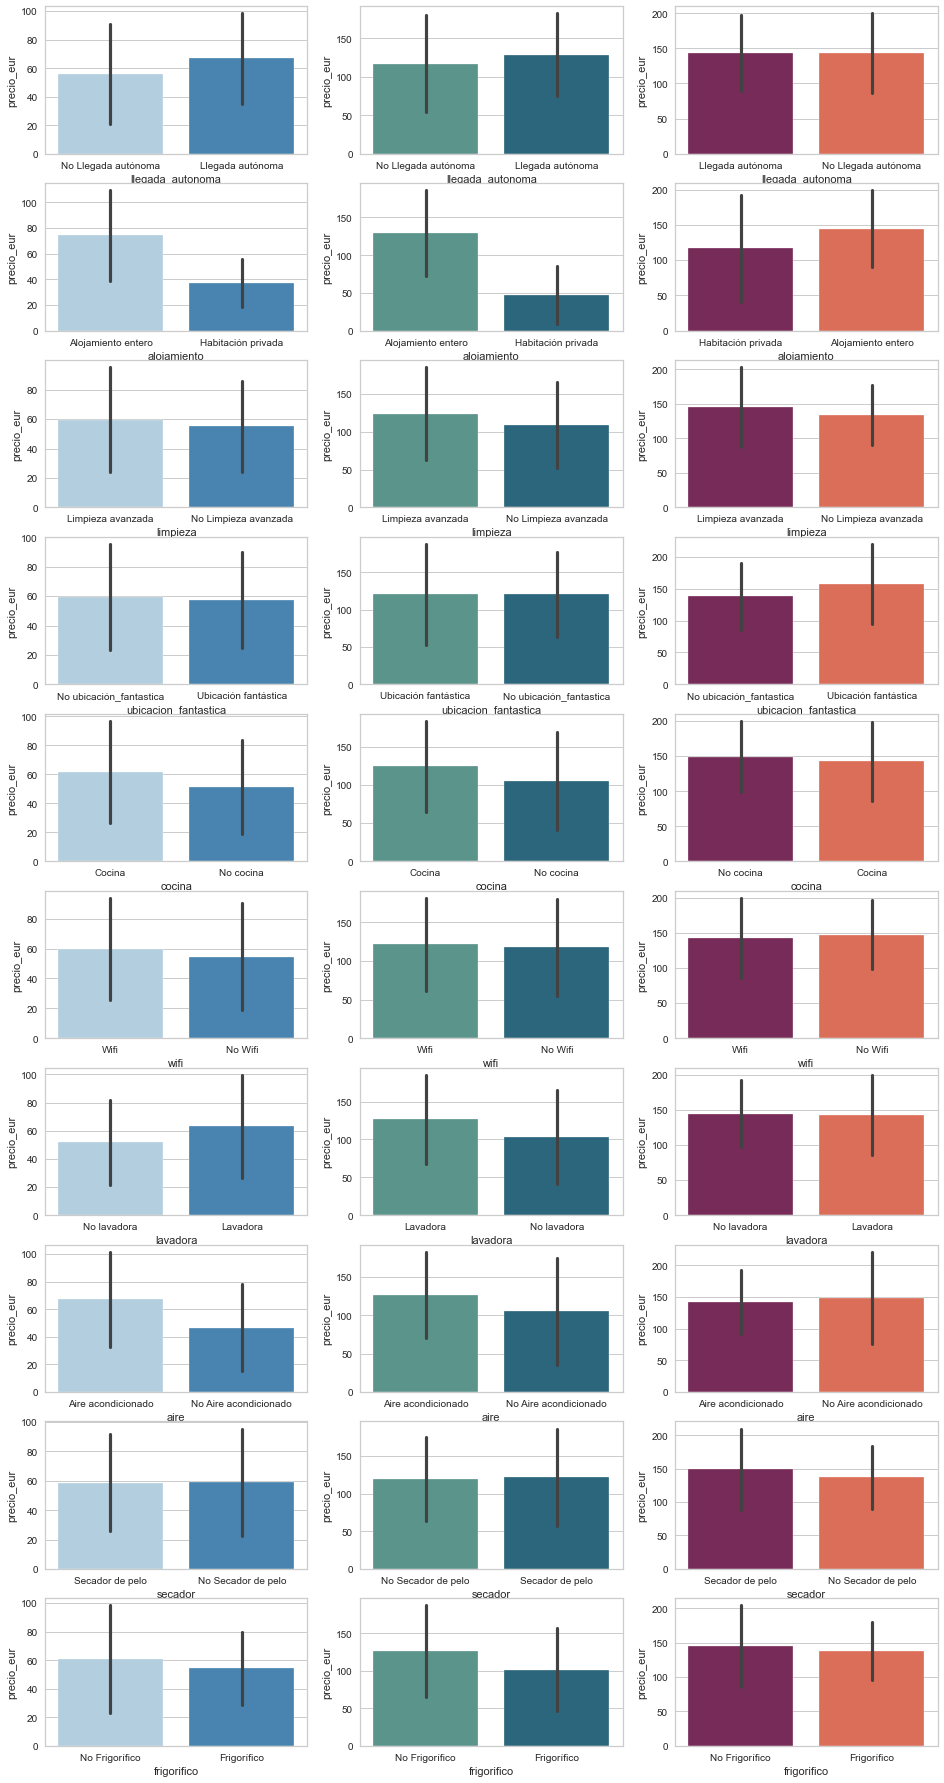

In [45]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(16,32))
sns.barplot(x="llegada_autonoma", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[0,0]);
sns.barplot(x="llegada_autonoma", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[0,1]);
sns.barplot(x="llegada_autonoma", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[0,2]);
sns.barplot(x="alojamiento", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[1,0]);
sns.barplot(x="alojamiento", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[1,1]);
sns.barplot(x="alojamiento", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[1,2]);
sns.barplot(x="limpieza", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[2,0]);
sns.barplot(x="limpieza", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[2,1]);
sns.barplot(x="limpieza", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[2,2]);
sns.barplot(x="ubicacion_fantastica", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[3,0]);
sns.barplot(x="ubicacion_fantastica", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[3,1]);
sns.barplot(x="ubicacion_fantastica", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[3,2]);
sns.barplot(x="cocina", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[4,0]);
sns.barplot(x="cocina", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[4,1]);
sns.barplot(x="cocina", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[4,2]);
sns.barplot(x="wifi", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[5,0]);
sns.barplot(x="wifi", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[5,1]);
sns.barplot(x="wifi", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[5,2]);
sns.barplot(x="lavadora", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[6,0]);
sns.barplot(x="lavadora", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[6,1]);
sns.barplot(x="lavadora", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[6,2]);
sns.barplot(x="aire", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[7,0]);
sns.barplot(x="aire", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[7,1]);
sns.barplot(x="aire", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[7,2]);
sns.barplot(x="secador", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[8,0]);
sns.barplot(x="secador", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[8,1]);
sns.barplot(x="secador", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[8,2]);
sns.barplot(x="frigorifico", y = "precio_eur", data=cluster_1,ci="sd", palette="Blues", ax=axs[9,0]);
sns.barplot(x="frigorifico", y = "precio_eur", data=cluster_0,ci="sd", palette="crest", ax=axs[9,1]);
sns.barplot(x="frigorifico", y = "precio_eur", data=cluster_2,ci="sd", palette="rocket", ax=axs[9,2]);

# VISUALIZACIÓN

In [46]:
df.columns

Index(['predict', 'huespedes', 'dormitorios', 'camas', 'baños', 'precio_eur',
       'valoracion', 'alojamiento', 'limpieza', 'llegada_autonoma',
       'ubicacion_fantastica', 'wifi', 'cocina', 'lavadora', 'aire', 'secador',
       'frigorifico', 'ciudad'],
      dtype='object')

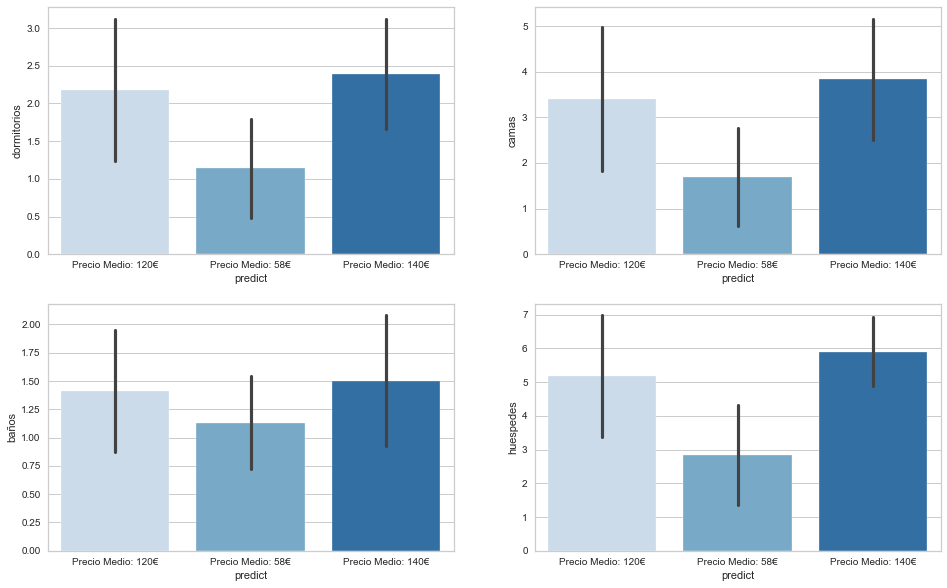

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
fig1 = sns.barplot(x="predict", y="dormitorios", data=df,ci="sd", palette="Blues", ax=axs[0,0]);
fig1.set(xticklabels=["Precio Medio: 120€", "Precio Medio: 58€", "Precio Medio: 140€"]);
fig2 = sns.barplot(x="predict", y="camas", data=df,ci="sd", palette="Blues", ax=axs[0,1]);
fig2.set(xticklabels=["Precio Medio: 120€", "Precio Medio: 58€", "Precio Medio: 140€"]);
fig3 = sns.barplot(x="predict", y="baños", data=df,ci="sd", palette="Blues", ax=axs[1,0]);
fig3.set(xticklabels=["Precio Medio: 120€", "Precio Medio: 58€", "Precio Medio: 140€"]);
fig4 = sns.barplot(x="predict", y="huespedes", data=df,ci="sd", palette="Blues", ax=axs[1,1]);
fig4.set(xticklabels=["Precio Medio: 120€", "Precio Medio: 58€", "Precio Medio: 140€"]);

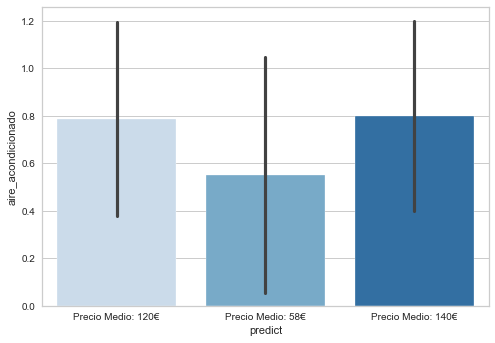

In [48]:
fig = sns.barplot(x="predict", y="aire_acondicionado", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);

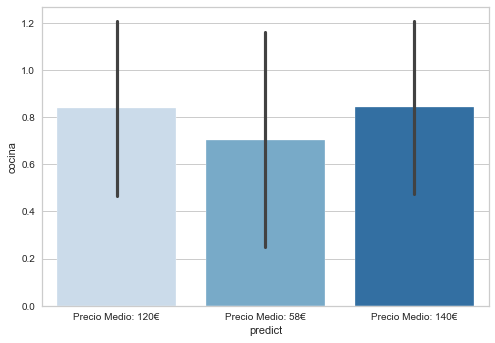

In [49]:
fig=sns.barplot(x="predict", y="cocina", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);

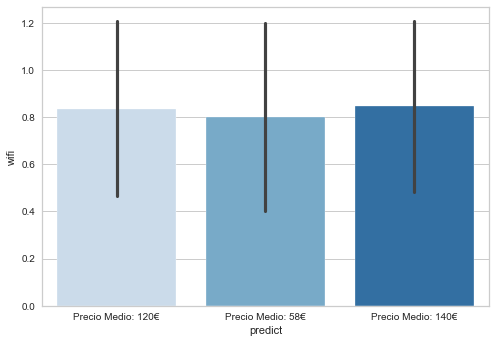

In [50]:
fig = sns.barplot(x="predict", y="wifi", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);

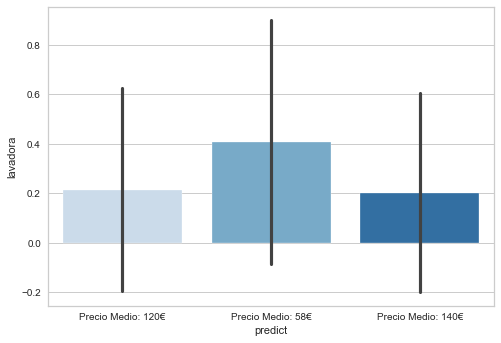

In [51]:
fig = sns.barplot(x="predict", y="lavadora", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);

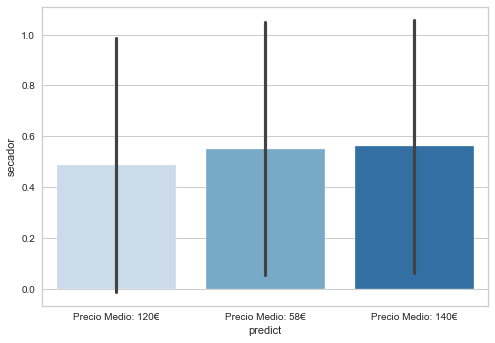

In [52]:
fig = sns.barplot(x="predict", y="secador", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);

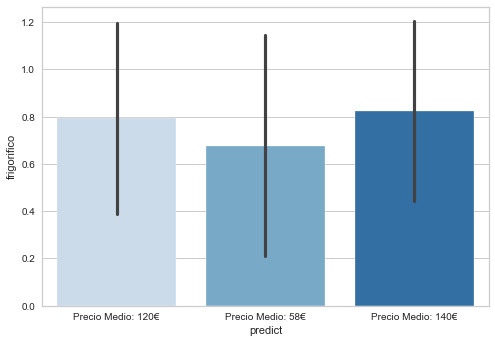

In [53]:
fig = sns.barplot(x="predict", y="frigorifico", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);

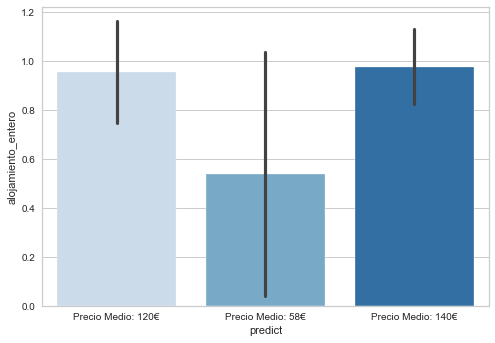

In [54]:
fig = sns.barplot(x="predict", y="alojamiento_entero", data=datos,ci="sd", palette="Blues")
fig.set(xticklabels=["Precio Medio: 120€","Precio Medio: 58€", "Precio Medio: 140€"]);